In [10]:
%matplotlib inline
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Load settings
settings_fpath = "../params/test.json"
settings = None
with open(settings_fpath) as fp:
    settings = json.load(fp)

# Data file:
data_fpath = "/Users/amlalejini/Desktop/scratch/oopf16/processed/processed_fdom__2016-11-10.csv"

# Load data:
df = pd.read_csv(data_fpath)        

In [12]:
df

,treatment,replicate,tree_depth,is_plastic,is_optimal,phenotype_score,max_phenotype_score,phenotype_signature,phenotype_by_env,generation_length_by_env,fitness_by_env,env_order
0,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,10,4886,1,1,1,1,1,0|1,208|208,0.480769|0.961538,PUNISH_NOT|REWARD_NOT
1,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,7,4759,1,1,1,1,1,0|1,213|213,0.469484|0.938967,PUNISH_NOT|REWARD_NOT
2,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,17,4753,1,1,1,1,1,0|1,207|207,0.478261|0.956522,PUNISH_NOT|REWARD_NOT
3,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,13,4690,1,1,1,1,1,0|1,211|211,0.516588|1.03318,PUNISH_NOT|REWARD_NOT
4,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,19,4577,1,1,1,1,1,0|1,88|88,0.545455|1.09091,PUNISH_NOT|REWARD_NOT
5,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,3,5113,1,1,1,1,1,0|1,233|233,0.493562|0.987124,PUNISH_NOT|REWARD_NOT
6,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,9,4807,1,1,1,1,1,0|1,175|175,0.502857|1.00571,PUNISH_NOT|REWARD_NOT
7,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,4,4781,1,1,1,1,1,0|1,182|182,0.505495|1.01099,PUNISH_NOT|REWARD_NOT
8,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,14,4257,1,1,1,1,1,0|1,131|131,0.549618|1.09924,PUNISH_NOT|REWARD_NOT
9,ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075,16,3432,1,1,1,1,1,0|1,102|102,0.558824|1.11765,PUNISH_NOT|REWARD_NOT


In [13]:
# Function to get attributes from a treatment name. 
def GetTreatmentAttr(treatment, attr):
    """
    Given a treatment name and an attribute, what are its attributes?
    """
    attrs = {attr.split("_")[0]:attr.split("_")[1:] for attr in treatment.split("__")}
    return attrs[attr]
    
# Get a list of treatments.
# Additionally, cross-section the data in meaningful ways. 
# * By environment, get all change rates for that environment. 
# * By change rate, get all environments at that change rate. 
all_treatments = set([])
by_environment = {}
by_change_rate = {}
change_rates = set([])
for treatment in df['treatment']:
    all_treatments.add(treatment)
    # First, strip out change rate. 
    attrs = {attr.split("_")[0]:attr.split("_")[1:] for attr in treatment.split("__")}
    if not attrs["cr"][0] in by_change_rate:
        by_change_rate[attrs["cr"][0]] = set()
    by_change_rate[attrs["cr"][0]].add(treatment)
    change_rates.add(attrs["cr"][0])
    env_signature = "__".join([attr + "_" + "_".join(attrs[attr]) for attr in attrs if attr != "cr"])
    if not env_signature in by_environment:
        by_environment[env_signature] = set()
    by_environment[env_signature].add(treatment)

# Add 0 change rate environments to by_environment
for env in by_environment:
    tasks = GetTreatmentAttr(env, "tasks")
    if len(tasks) == 1 and tasks[0] == "NAND":
        by_environment[env].add("ntasks_1__envs_1__cr_0__tasks_NAND__mr_p0075")
    elif len(tasks) == 1 and tasks[0] == "NOT":
        by_environment[env].add("ntasks_1__envs_1__cr_0__tasks_NOT__mr_p0075")
    elif len(tasks) == 2 and ("NAND" in tasks and "NOT" in tasks):
        by_environment[env].add("ntasks_2__envs_1__cr_0__tasks_NAND_NOT__mr_p0075")

change_rates = map(int, list(change_rates))
change_rates.sort()
change_rates = map(str, change_rates)


In [14]:
# For each treatment count the total number of observations, and the total number of observations that are plastic.
for treatment in all_treatments:
    num_plastic = len(df[(df.treatment == treatment) & (df.is_plastic == 1)])
    total_obs = len(df[df.treatment == treatment])
    num_optimal = len(df[(df.treatment == treatment) & (df.is_optimal == 1)])
    print "%s:\n  Plasticity: %d/%d (%f)" % (treatment, num_plastic, total_obs, float(num_plastic) / total_obs)
    print "  Optimality: %d/%d (%f)" % (num_optimal, total_obs, float(num_optimal) / total_obs)


ntasks_1__envs_2__cr_25__tasks_NOT__mr_p0075:
  Plasticity: 20/20 (1.000000)
  Optimality: 20/20 (1.000000)
ntasks_1__envs_2__cr_50__tasks_NOT__mr_p0075:
  Plasticity: 18/20 (0.900000)
  Optimality: 18/20 (0.900000)
ntasks_1__envs_2__cr_800__tasks_NAND__mr_p0075:
  Plasticity: 0/50 (0.000000)
  Optimality: 0/50 (0.000000)
ntasks_2__envs_4__cr_800__tasks_NAND_NOT__mr_p0075:
  Plasticity: 11/50 (0.220000)
  Optimality: 0/50 (0.000000)
ntasks_2__envs_4__cr_100__tasks_NAND_NOT__mr_p0075:
  Plasticity: 44/50 (0.880000)
  Optimality: 15/50 (0.300000)
ntasks_2__envs_4__cr_400__tasks_NAND_NOT__mr_p0075:
  Plasticity: 16/50 (0.320000)
  Optimality: 0/50 (0.000000)
ntasks_1__envs_2__cr_1__tasks_NOT__mr_p0075:
  Plasticity: 7/20 (0.350000)
  Optimality: 4/20 (0.200000)
ntasks_2__envs_4__cr_1600__tasks_NAND_NOT__mr_p0075:
  Plasticity: 3/50 (0.060000)
  Optimality: 0/50 (0.000000)
ntasks_1__envs_2__cr_200__tasks_NAND__mr_p0075:
  Plasticity: 19/50 (0.380000)
  Optimality: 19/50 (0.380000)
ntasks_2

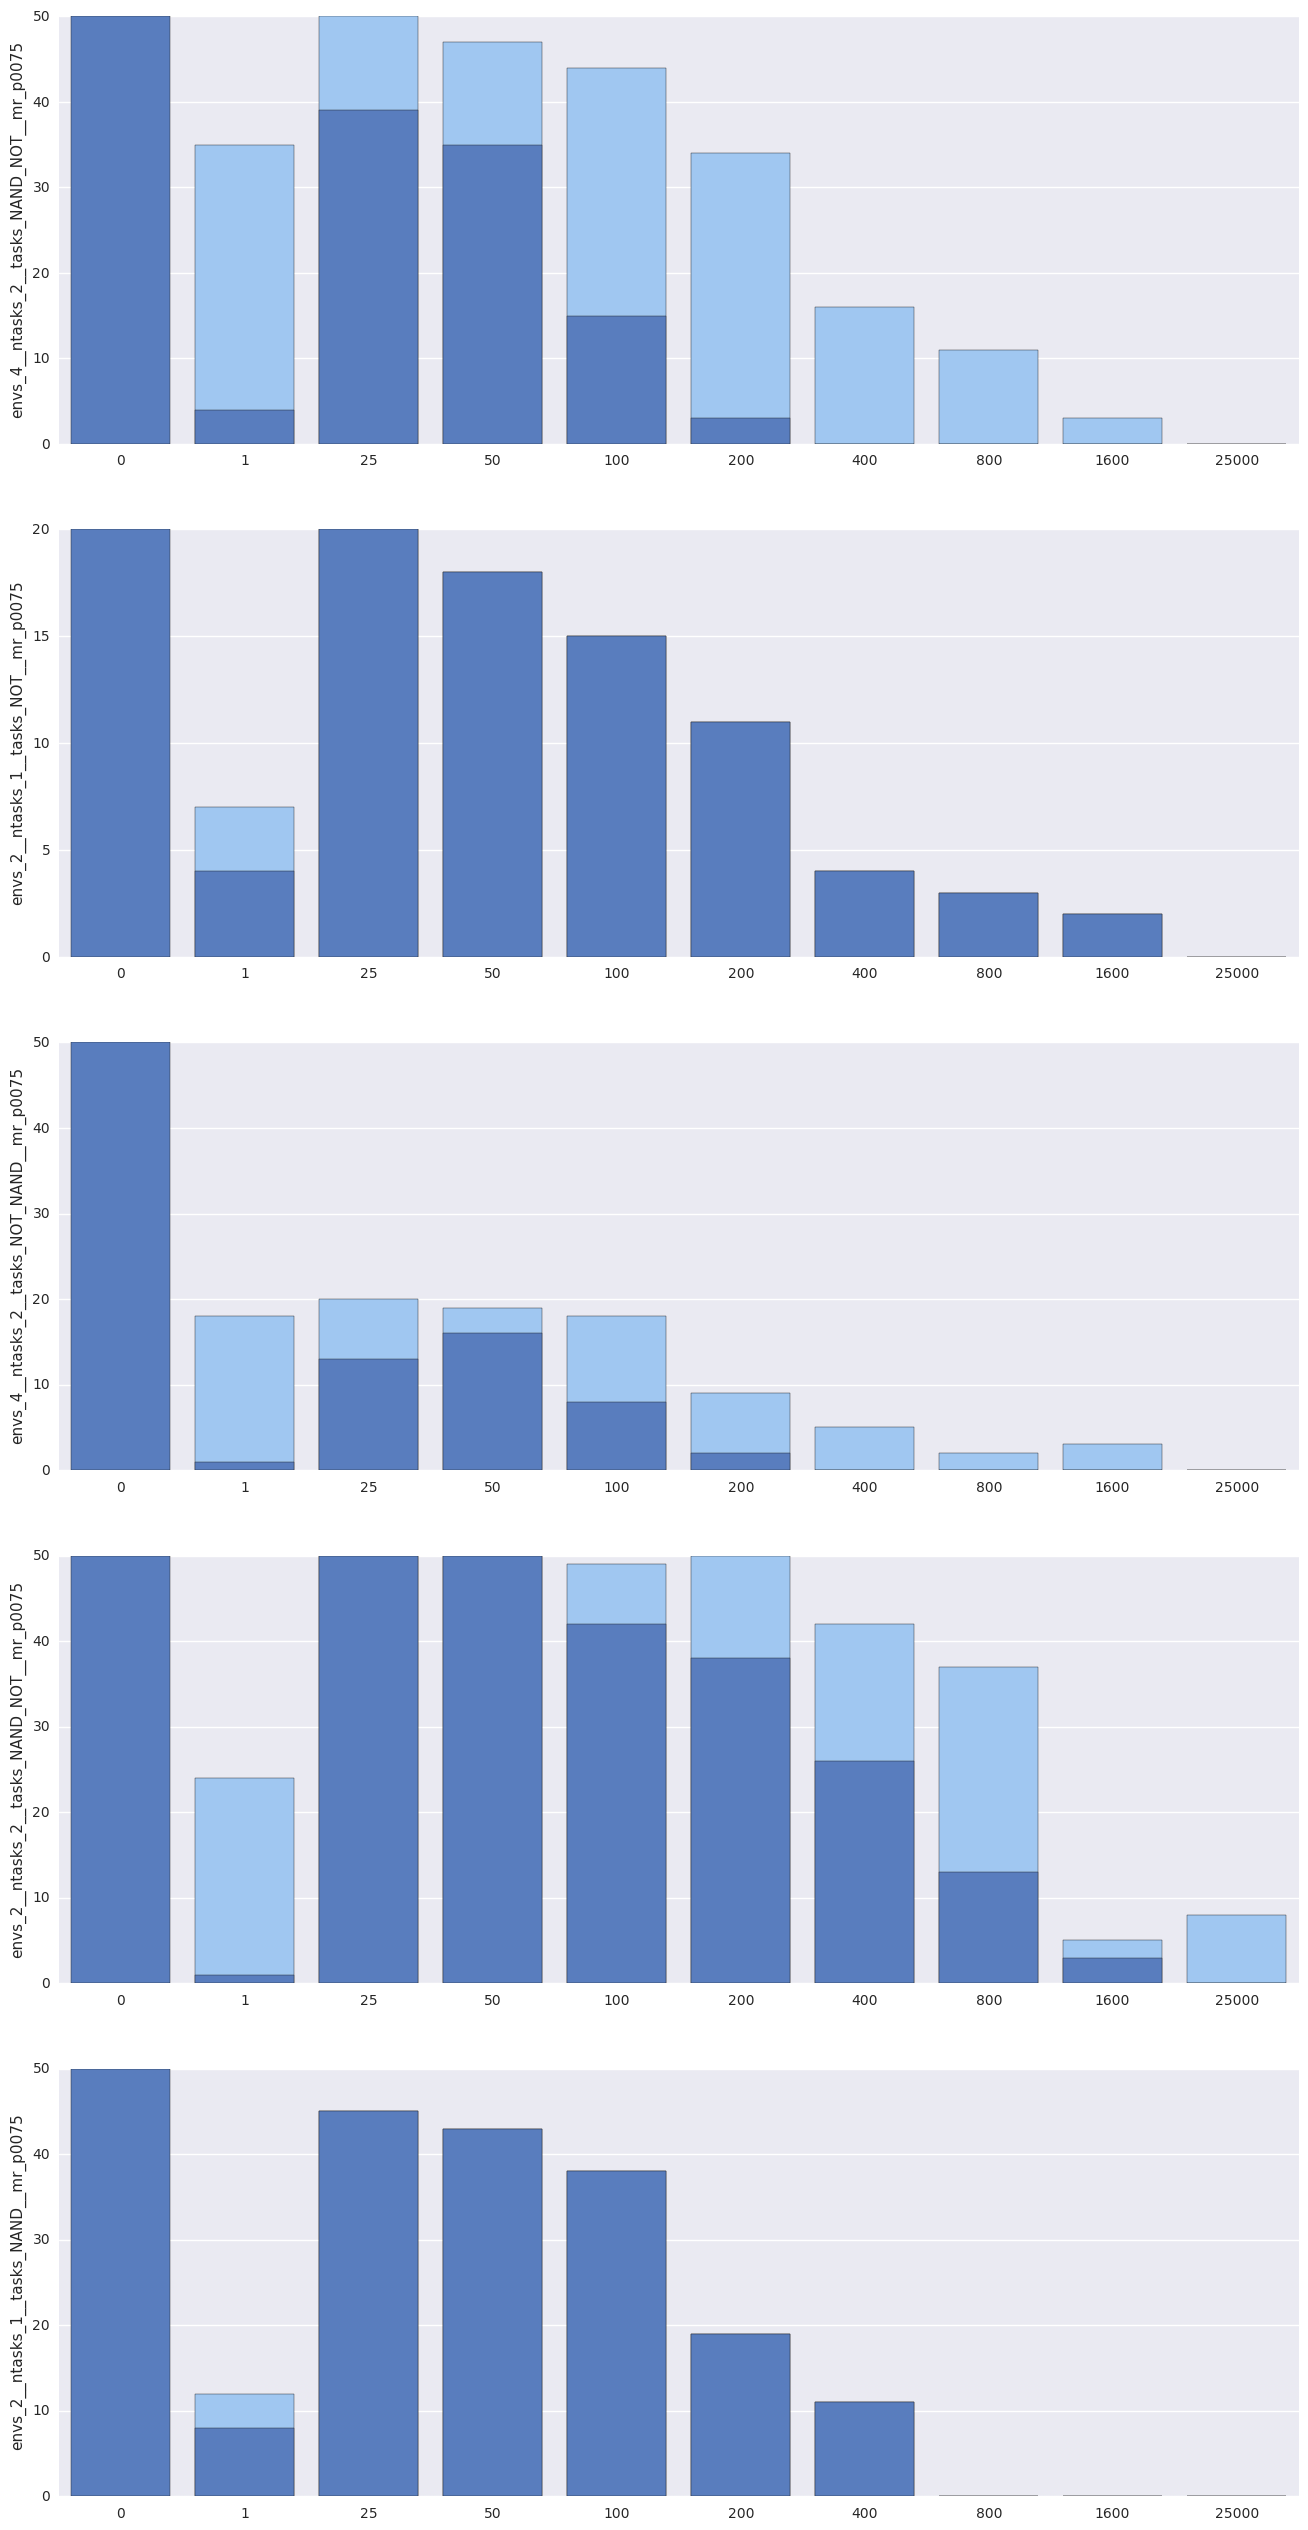

In [30]:
# Make plasticity by environment bar chart. (skip over constant environments, they are included in all plots)
fig, axes = plt.subplots(nrows = len(by_environment.keys()) - 3, ncols = 1, figsize = (16, 32))
axi = 0
for env in by_environment:
    treatments = list(by_environment[env])
    if len(treatments) == 1: continue 
    treatments.sort(key = lambda treatment: int(GetTreatmentAttr(treatment, "cr")[0]))
    x = [int(GetTreatmentAttr(treatment, "cr")[0]) for treatment in treatments]
    y_optimal = [len(df[(df.treatment == treatment) & (df.is_optimal == 1)]) for treatment in treatments]
    y_plastic = [len(df[(df.treatment == treatment) & (df.is_plastic == 1)]) for treatment in treatments]
    sns.set_color_codes("pastel")
    sns.barplot(x, y_plastic, color = "b", ax = axes[axi]) 
    sns.set_color_codes("muted")
    sns.barplot(x, y_optimal, color = "b", ax = axes[axi])
    axes[axi].set_ylabel(env)
    axi += 1
   


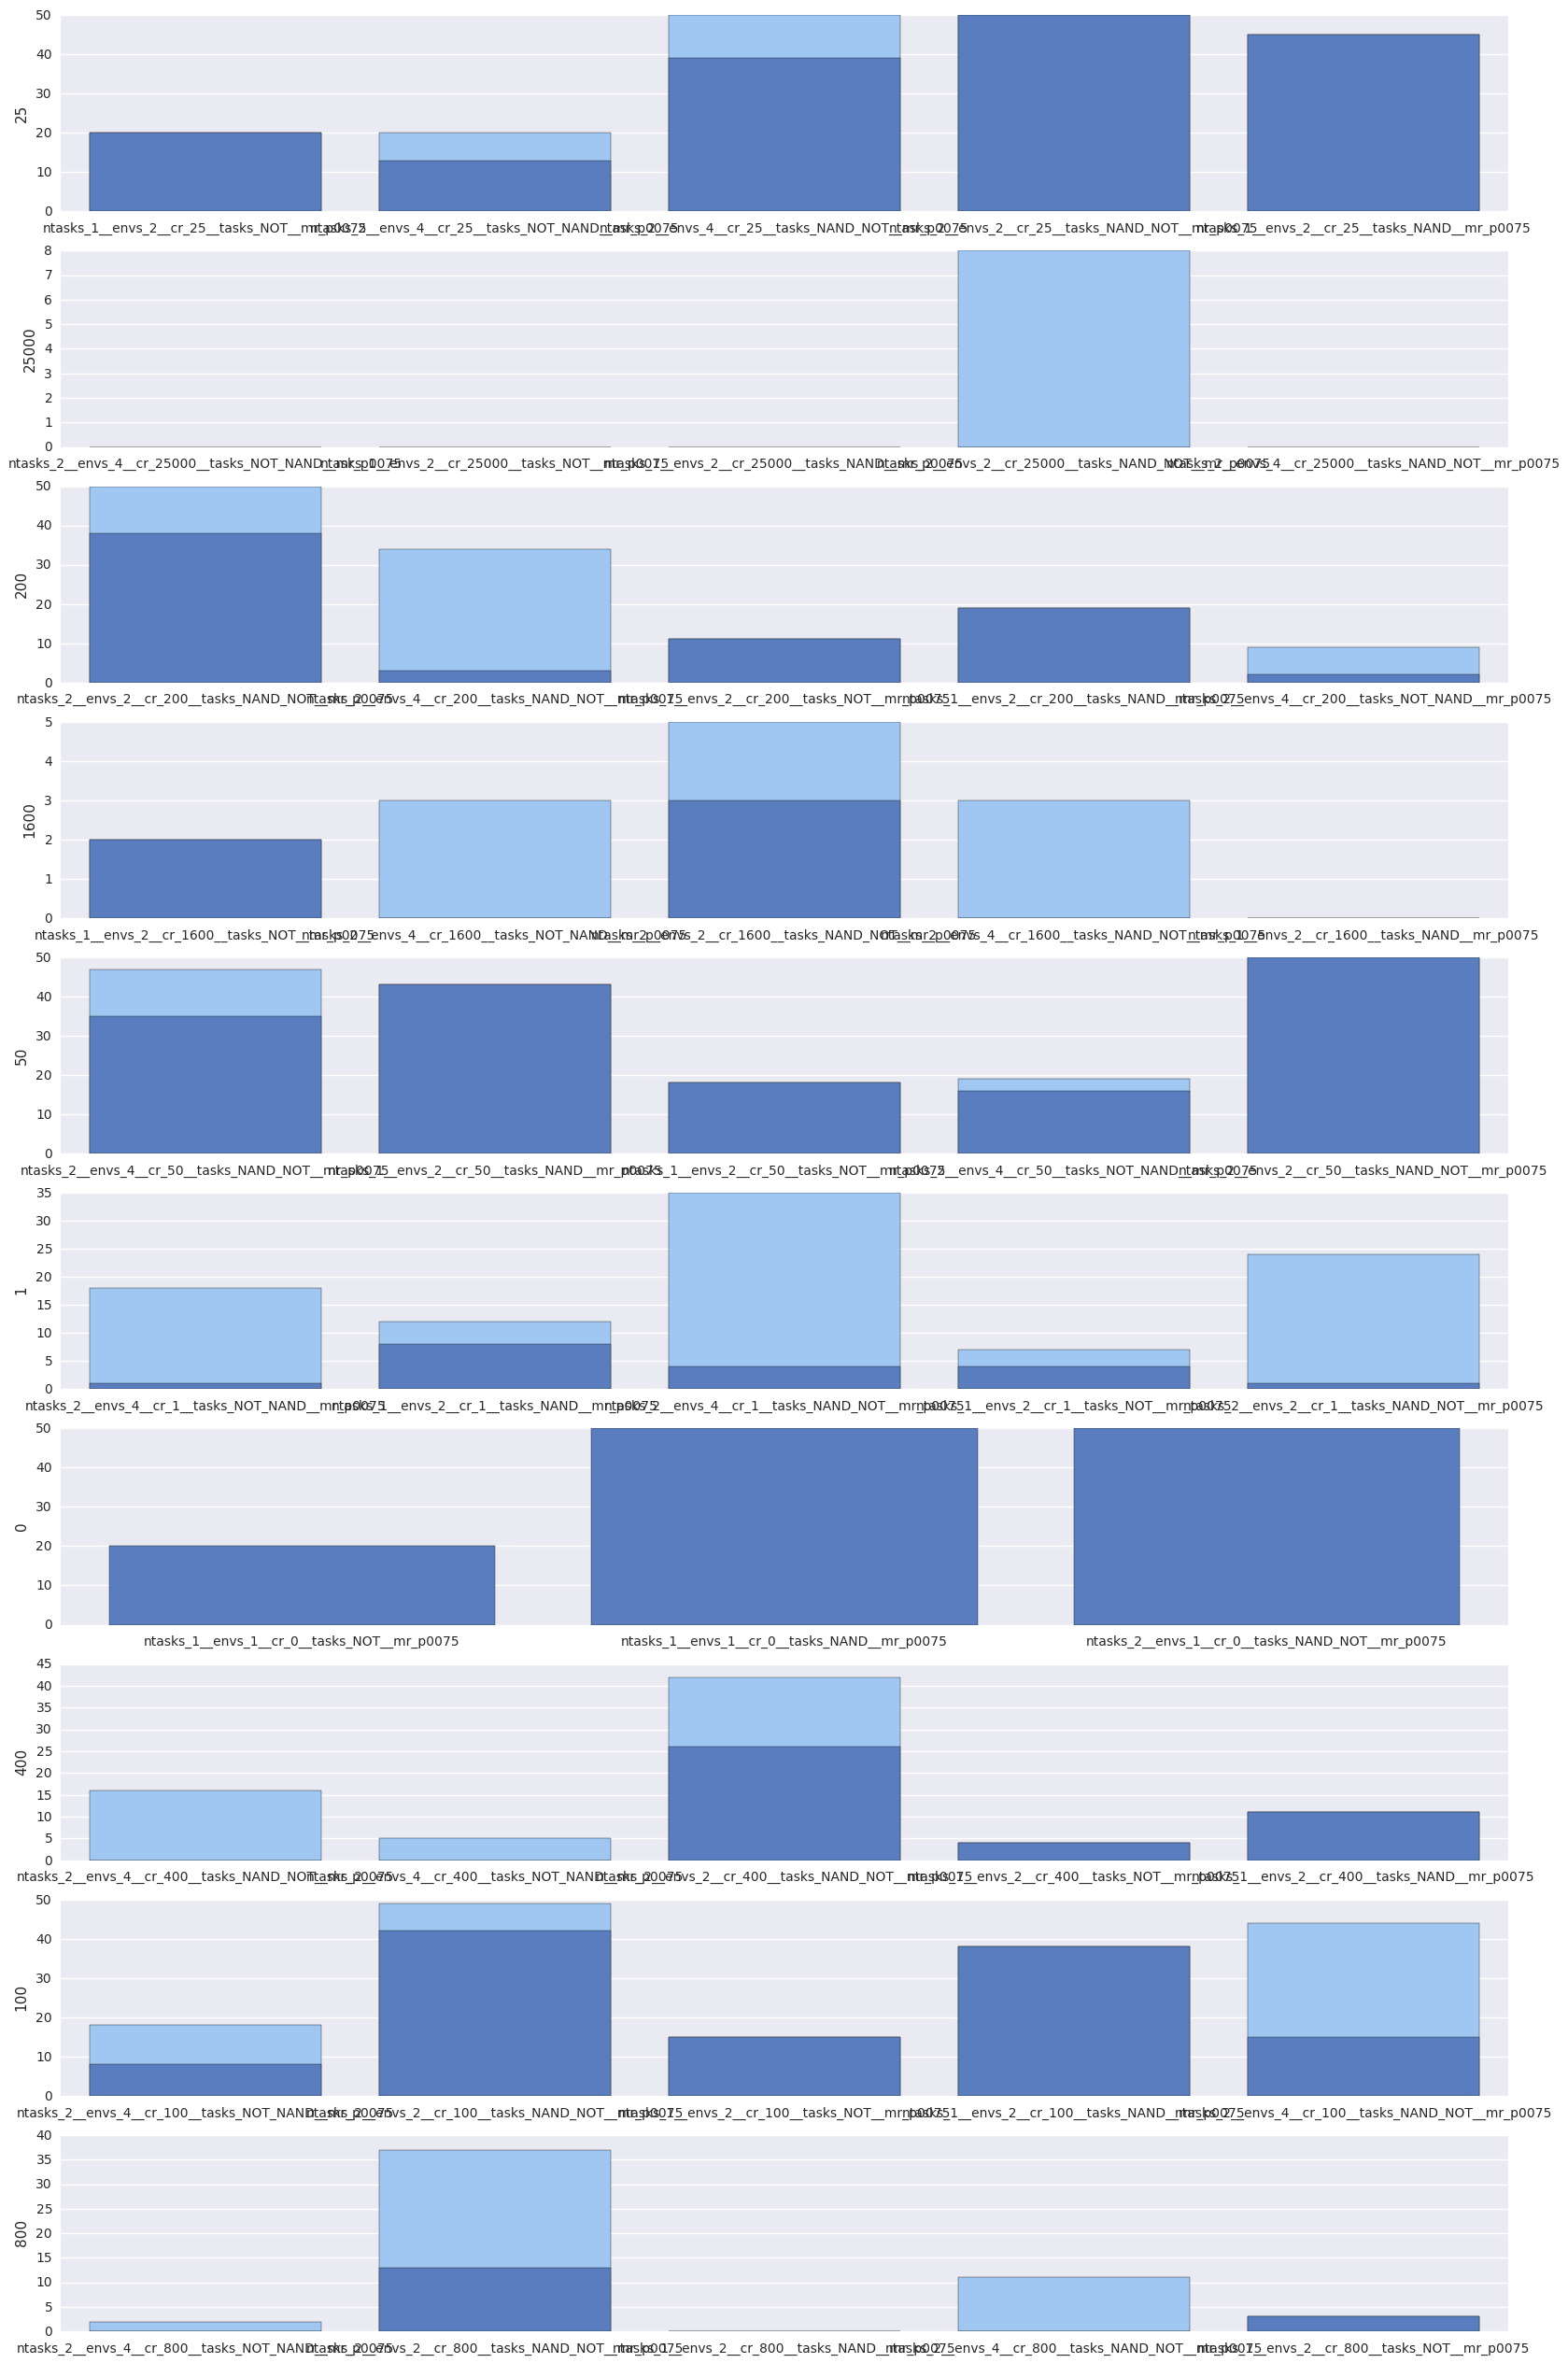

In [35]:
# Make plasticity by change rate bar chart. (skip over constant environments, they are included in all plots)
fig, axes = plt.subplots(nrows = len(by_change_rate.keys()), ncols = 1, figsize = (20, 32))
axi = 0
for cr in by_change_rate:
    treatments = list(by_change_rate[cr])
    # TODO: sort environments by complexity
    x = [treatment for treatment in treatments]
    y_optimal = [len(df[(df.treatment == treatment) & (df.is_optimal == 1)]) for treatment in treatments]
    y_plastic = [len(df[(df.treatment == treatment) & (df.is_plastic == 1)]) for treatment in treatments]
    sns.set_color_codes("pastel")
    sns.barplot(x, y_plastic, color = "b", ax = axes[axi]) 
    sns.set_color_codes("muted")
    sns.barplot(x, y_optimal, color = "b", ax = axes[axi])
    axes[axi].set_ylabel(cr)
    axi += 1

In [ ]:
# TODO: violin plot of scores